In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Các thư viện Scikit-learn (sklearn)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Yêu cầu (c)
from sklearn.ensemble import RandomForestRegressor # Dùng cho câu (e)
from sklearn.metrics import mean_squared_error # Dùng cho câu (d)

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

# --- Tải Dữ liệu ---
file_path = 'airfoil_self_noise_data.csv'
df = pd.read_csv(file_path)

print("Tải dữ liệu thành công!")
print(df.head())

Tải dữ liệu thành công!
   frequency  attack-angle  chord-length  free-stream-velocity  \
0        800           0.0        0.3048                  71.3   
1       1000           0.0        0.3048                  71.3   
2       1250           0.0        0.3048                  71.3   
3       1600           0.0        0.3048                  71.3   
4       2000           0.0        0.3048                  71.3   

   suction-side-displacement-thickness  scaled-sound-pressure  
0                             0.002663                126.201  
1                             0.002663                125.201  
2                             0.002663                125.951  
3                             0.002663                127.591  
4                             0.002663                127.461  


--- Câu (a): Biểu đồ Vận tốc dòng không khí vs. Mức áp suất âm thanh ---


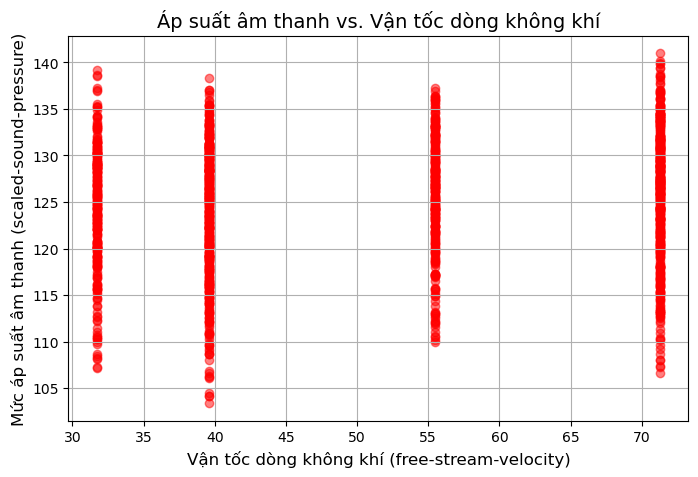

In [4]:
print("--- Câu (a): Biểu đồ Vận tốc dòng không khí vs. Mức áp suất âm thanh ---")

# 1. Lấy dữ liệu cho các trục
x_velocity = df['free-stream-velocity']
y_sound = df['scaled-sound-pressure']

# 2. Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.scatter(x_velocity, y_sound, alpha=0.5, color='red')

# 3. Đặt tên cho các trục và tiêu đề
plt.title('Áp suất âm thanh vs. Vận tốc dòng không khí', fontsize=14)
plt.xlabel('Vận tốc dòng không khí (free-stream-velocity)', fontsize=12)
plt.ylabel('Mức áp suất âm thanh (scaled-sound-pressure)', fontsize=12)
plt.grid(True)
plt.show()

--- Câu (b): Biểu đồ Vị trí (Chord, Vận tốc) vs. Áp suất âm thanh ---


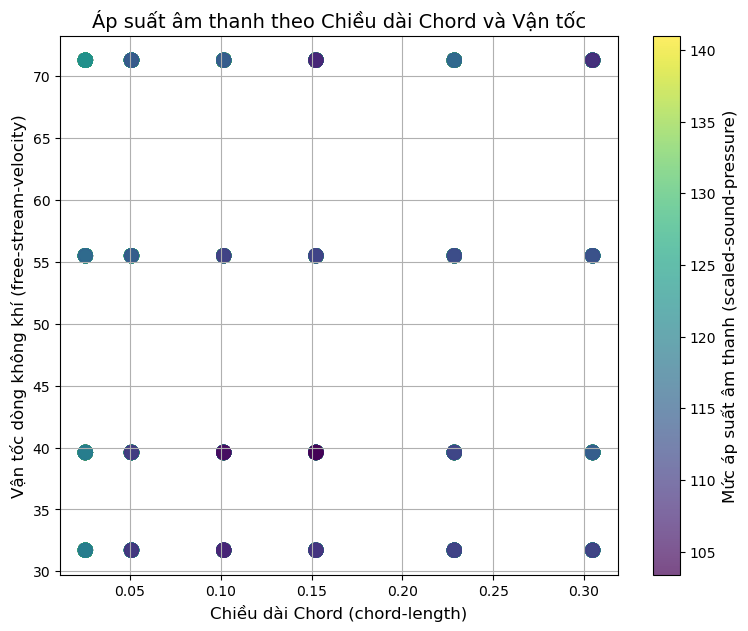

In [6]:
print("--- Câu (b): Biểu đồ Vị trí (Chord, Vận tốc) vs. Áp suất âm thanh ---")

# 1. Lấy dữ liệu cho các trục và màu sắc
x_chord = df['chord-length']
y_velocity = df['free-stream-velocity']
colors_sound = df['scaled-sound-pressure'] # Dùng độ ồn làm màu

# 2. Vẽ biểu đồ
plt.figure(figsize=(9, 7))
# 'c=colors_sound' -> gán giá trị độ ồn cho màu
# 'cmap='viridis'' -> dùng thang màu 'viridis' (Tím-Lạnh-Giá thấp đến Vàng-Nóng-Giá cao)
scatter = plt.scatter(x_chord, y_velocity, c=colors_sound, cmap='viridis', alpha=0.7, s=100) # s=100 để điểm to hơn

# 3. Thêm thanh màu (colorbar) để chú thích
cbar = plt.colorbar(scatter)
cbar.set_label('Mức áp suất âm thanh (scaled-sound-pressure)', fontsize=12)

# 4. Đặt tên cho các trục và tiêu đề
plt.title('Áp suất âm thanh theo Chiều dài Chord và Vận tốc', fontsize=14)
plt.xlabel('Chiều dài Chord (chord-length)', fontsize=12)
plt.ylabel('Vận tốc dòng không khí (free-stream-velocity)', fontsize=12)
plt.grid(True)
plt.show()

In [8]:
print("--- Câu (c): Chia dữ liệu và Huấn luyện Linear Regression ---")

# 1. Tách X (đặc trưng) và y (mục tiêu)
X = df.drop('scaled-sound-pressure', axis=1)
y = df['scaled-sound-pressure']

# 2. Chia dữ liệu (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Đã chia dữ liệu: {len(X_train)} mẫu huấn luyện, {len(X_test)} mẫu kiểm thử.")

# 3. Chuẩn hóa dữ liệu
# Bước này rất quan trọng để mô hình hồi quy hội tụ tốt
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Đã chuẩn hóa (scale) dữ liệu X_train và X_test.")

# 4. Huấn luyện mô hình Linear Regression [cite: 3223-3243]
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train) # Huấn luyện trên dữ liệu đã chuẩn hóa

print("Đã huấn luyện xong mô hình LinearRegression!")


print("\n--- Câu (d): Đánh giá mô hình bằng MSE ---")
# 1. Dự đoán trên tập kiểm thử
y_pred_lr = model_lr.predict(X_test_scaled)

# 2. Tính toán MSE (Mean Squared Error) [cite: 355-359]
mse_lr = mean_squared_error(y_test, y_pred_lr) 
# (Tùy chọn) Tính RMSE (Root MSE) để dễ hiểu hơn (sai số trung bình tính bằng Decibel)
rmse_lr = np.sqrt(mse_lr)

print(f"   Chỉ số MSE (Mean Squared Error): {mse_lr:.4f}")
print(f"   Chỉ số RMSE (Root MSE): {rmse_lr:.4f}")

# 3. Kiểm tra kết quả
if mse_lr < 15:
    print(f"   => Mô hình Linear Regression ĐÃ ĐẠT yêu cầu (MSE < 15)")
else:
    print(f"   => Mô hình Linear Regression CHƯA ĐẠT yêu cầu (MSE < 15)")

--- Câu (c): Chia dữ liệu và Huấn luyện Linear Regression ---
Đã chia dữ liệu: 1202 mẫu huấn luyện, 301 mẫu kiểm thử.
Đã chuẩn hóa (scale) dữ liệu X_train và X_test.
Đã huấn luyện xong mô hình LinearRegression!

--- Câu (d): Đánh giá mô hình bằng MSE ---
   Chỉ số MSE (Mean Squared Error): 22.1286
   Chỉ số RMSE (Root MSE): 4.7041
   => Mô hình Linear Regression CHƯA ĐẠT yêu cầu (MSE < 15)


In [10]:
print(f"--- Câu (e): Tối ưu mô hình (Mục tiêu: MSE < 15) ---")
print(f"(MSE của Linear Regression: {mse_lr:.4f} (Chưa đạt))")

# 1. Định nghĩa không gian tham số (param_grid)
# Chúng ta sẽ thử các kết hợp của số lượng cây (n_estimators) và độ sâu (max_depth)
param_grid = {
    'n_estimators': [50, 100, 200], # Số lượng cây
    'max_depth': [10, 20, None],     # Độ sâu tối đa
    'min_samples_leaf': [1, 2]       # Số mẫu tối thiểu ở mỗi lá
}

# 2. Khởi tạo GridSearchCV
# scoring='neg_mean_squared_error' -> GridSearch sẽ tối ưu MSE (càng gần 0 càng tốt)
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                           param_grid, 
                           cv=5, # 5-fold cross-validation
                           scoring='neg_mean_squared_error', 
                           verbose=1)

print("Bắt đầu Grid Search cho RandomForest...")
# RandomForest không bắt buộc dùng dữ liệu đã chuẩn hóa (scaled)
# Chúng ta sẽ huấn luyện trên dữ liệu GỐC (X_train)
grid_search.fit(X_train, y_train)

# 3. In ra kết quả tốt nhất
print("\nGrid Search hoàn tất!")
print(f"Các tham số tốt nhất tìm được: {grid_search.best_params_}")

# 4. Lấy mô hình tốt nhất
best_model_rf = grid_search.best_estimator_

# --- Đánh giá lại mô hình TỐT NHẤT trên tập TEST ---
y_pred_best = best_model_rf.predict(X_test) # Dùng X_test gốc

print("\n--- Đánh giá mô hình RandomForest TỐT NHẤT ---")
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print(f"   Chỉ số MSE (Random Forest): {mse_best:.4f}")
print(f"   Chỉ số RMSE (Random Forest): {rmse_best:.4f}")

# 5. Kiểm tra kết quả
if mse_best < 15:
    print(f"\nCHÚC MỪNG! Đã đạt được giá trị kỳ vọng (MSE = {mse_best:.4f} < 15)")
else:
    print(f"\nCHƯA ĐẠT MỤC TIÊU. (MSE = {mse_best:.4f} >= 15)")

--- Câu (e): Tối ưu mô hình (Mục tiêu: MSE < 15) ---
(MSE của Linear Regression: 22.1286 (Chưa đạt))
Bắt đầu Grid Search cho RandomForest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Grid Search hoàn tất!
Các tham số tốt nhất tìm được: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}

--- Đánh giá mô hình RandomForest TỐT NHẤT ---
   Chỉ số MSE (Random Forest): 3.2731
   Chỉ số RMSE (Random Forest): 1.8092

CHÚC MỪNG! Đã đạt được giá trị kỳ vọng (MSE = 3.2731 < 15)
